In [1]:
import pandas as pd
df=pd.read_csv("raw_data.csv",encoding='ISO-8859-1')

In [2]:
df.head(5)

,text,target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [3]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [4]:
df

,text,target
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
10859,This is the 2nd time we have tried 2 contact u...,1
10860,Will Ã_ b going to esplanade fr home?,0
10861,"Pity, * was in mood for that. So...any other s...",0
10862,The guy did some bitching but I acted like i'd...,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [5]:
df.duplicated().sum()

0

In [ ]:
df=df.drop_duplicates(keep='first')

In [6]:
df.shape

(10864, 2)

In [7]:
df['target'].value_counts()

0    8843
1    2021
Name: target, dtype: int64

In [8]:
import matplotlib.pyplot as plt

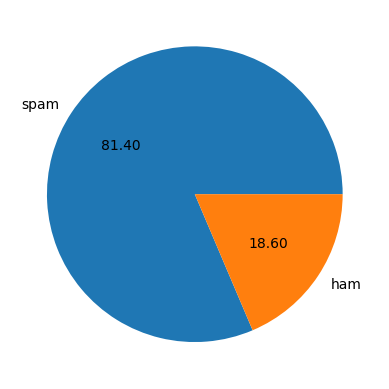

In [9]:
plt.pie(x=df['target'].value_counts(),labels=['spam','ham'],autopct="%0.2f")
plt.show()

In [ ]:
!pip install nltk

In [12]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
df['num_char']=df['text'].apply(len)

In [15]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df

,text,target,num_char,num_words,num_sent
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9
...,...,...,...,...,...
10859,This is the 2nd time we have tried 2 contact u...,1,163,35,4
10860,Will Ã_ b going to esplanade fr home?,0,38,9,1
10861,"Pity, * was in mood for that. So...any other s...",0,57,15,2
10862,The guy did some bitching but I acted like i'd...,0,125,27,1


In [18]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,10864.000000,10864.000000,10864.000000
mean,854.428295,180.834131,11.138071
std,1656.408684,341.069351,27.495325
min,2.000000,1.000000,1.000000
25%,64.000000,15.000000,2.000000
50%,217.000000,46.000000,4.000000
75%,1036.250000,224.000000,13.000000
max,43952.000000,8479.000000,1565.000000


In [19]:
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,8843.000000,8843.000000,8843.000000
mean,835.678503,178.675563,10.636662
std,1581.708710,329.348584,28.164459
min,2.000000,1.000000,1.000000
25%,51.000000,13.000000,1.000000
50%,159.000000,38.000000,3.000000
75%,1093.500000,235.000000,12.000000
max,43952.000000,8479.000000,1565.000000


In [20]:
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,2021.000000,2021.000000,2021.000000
mean,936.469075,190.279070,13.332014
std,1948.222442,388.164499,24.236870
min,13.000000,2.000000,1.000000
25%,157.000000,32.000000,3.000000
50%,412.000000,82.000000,7.000000
75%,925.000000,204.000000,13.000000
max,28432.000000,6131.000000,438.000000


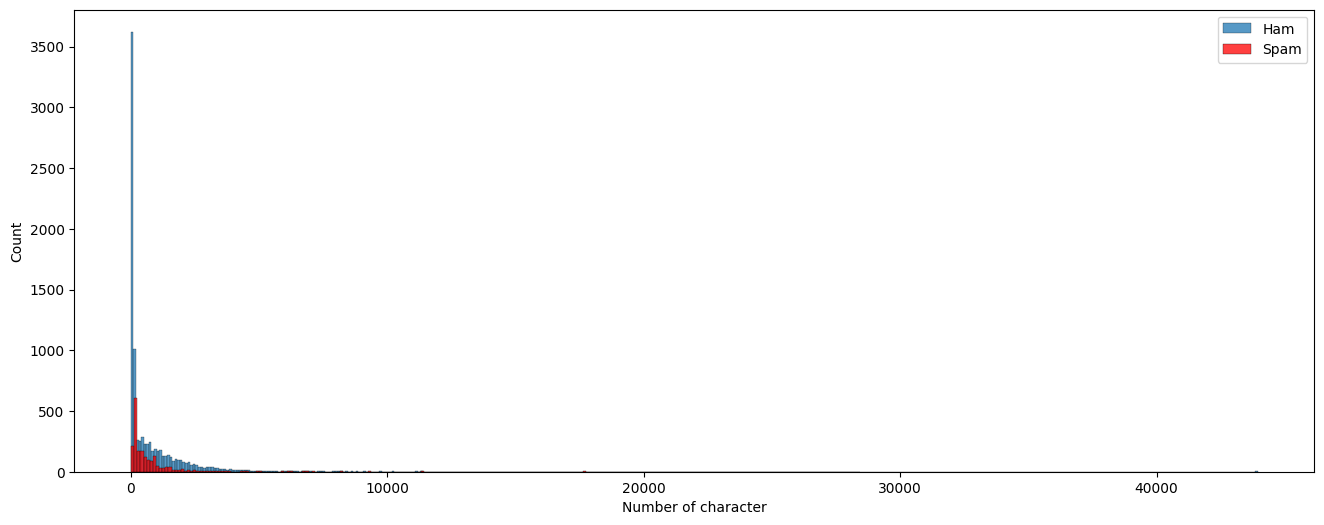

In [21]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.histplot(df[df['target']==0]['num_char'],label="Ham")
sns.histplot(df[df['target']==1]['num_char'],color='red',label="Spam")
plt.xlabel("Number of character")
plt.legend()

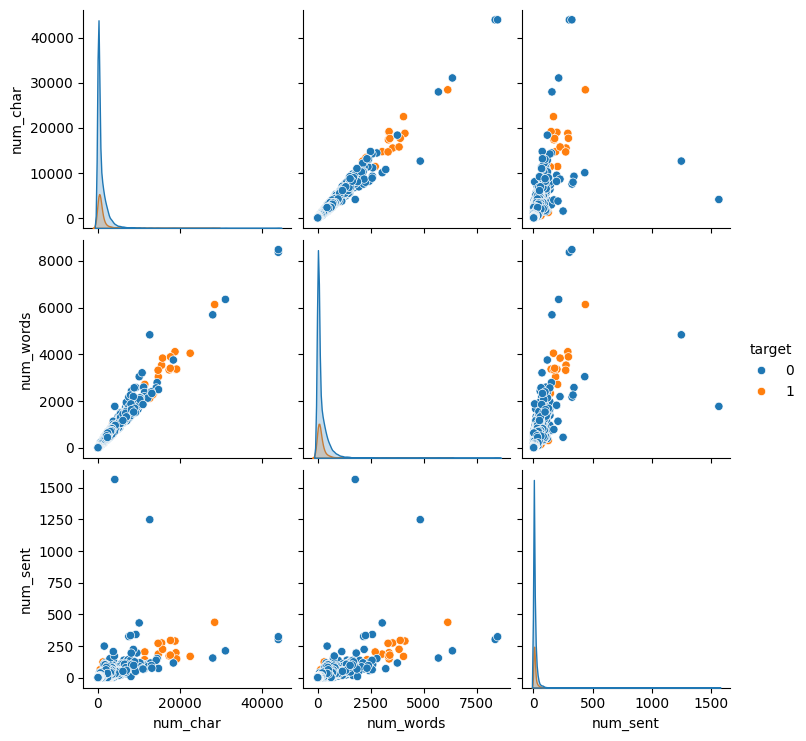

In [22]:
sns.pairplot(df,hue='target')

<ipython-input-35-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

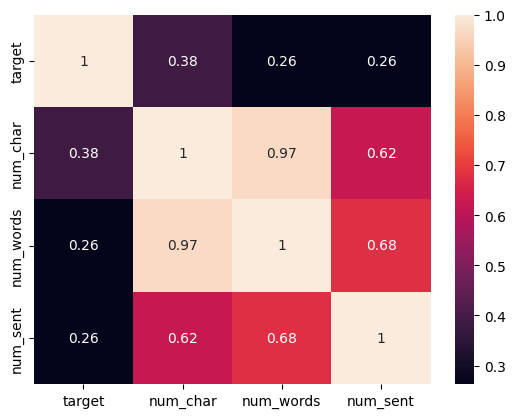

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [23]:
from nltk.stem.snowball import stopwords
import string
def transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [26]:
transform(df['text'][10])

'subject la vega high rise boom la vega fast becom major metropolitan citi 60 new high rise tower expect built around la vega strip within next 3 4 year 30 000 condominium boom begun buy first earli phase pre construct price avail la vega high rise includ trump cosmopolitan mgm turnberri icon sky among other join interest list http www verticallv com messag sent realti one highris learn www verticallv comif wish exclud futur mail pleas repli word remov subject line'

In [27]:
df['transformed message']=df['text'].apply(transform)

In [28]:
df.head(5)

,text,target,num_char,num_words,num_sent,transformed message
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [29]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [30]:
spam=wc.generate(df[df['target']==1]['transformed message'].str.cat(sep=" "))

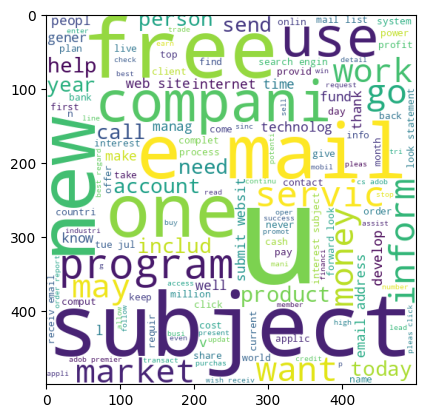

In [31]:
plt.imshow(spam)

In [32]:
ham=wc.generate(df[df['target']==0]['transformed message'].str.cat(sep=" "))

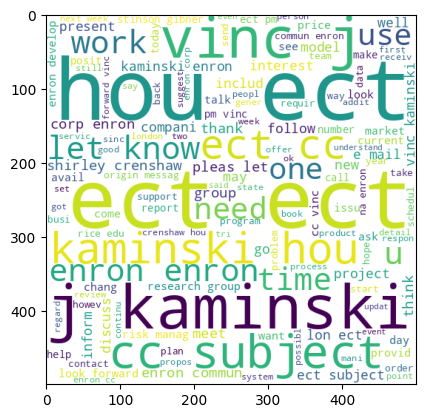

In [33]:
plt.imshow(ham)

In [34]:
spam_word=[]
for msg in df[df['target']==1]['transformed message'].tolist():
  for word in msg.split():
    spam_word.append(word)

In [38]:
len(spam_word)

184566

In [37]:
from collections import Counter

In [36]:
d=pd.DataFrame(Counter(spam_word).most_common(30))

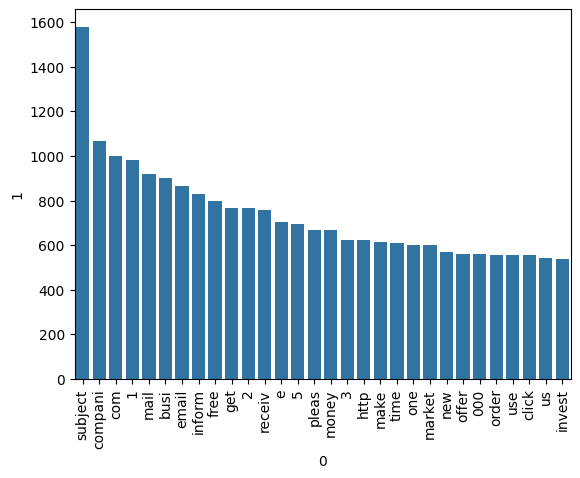

In [39]:
from collections import Counter
sns.barplot(x=d[0],y=d[1])
plt.xticks(rotation='vertical')
plt.show()

In [40]:
ham_word=[]
for msg in df[df['target']==0]['transformed message'].tolist():
for word in msg.split():
    ham_word.append(word)

In [41]:
len(ham_word)

738296

In [42]:
h=pd.DataFrame(Counter(ham_word).most_common(30))

In [43]:
h

,0,1
0,enron,13335
1,ect,11410
2,subject,8565
3,vinc,8468
4,hou,5567
5,2000,4933
6,kaminski,4754
7,pleas,4514
8,com,4398
9,would,4199


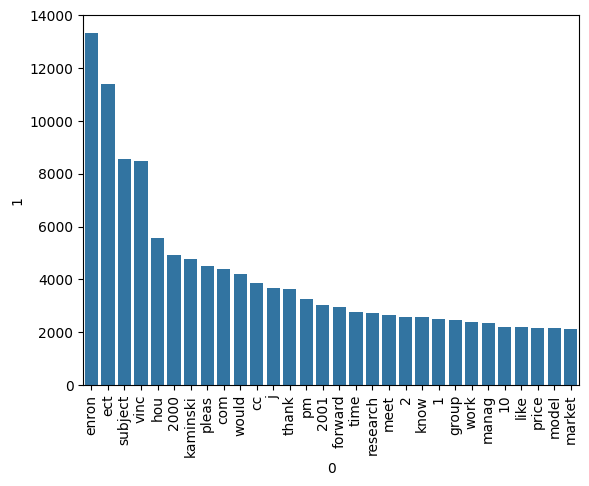

In [44]:
sns.barplot(x=h[0],y=h[1])
plt.xticks(rotation='vertical')
plt.show()

## 4.Model

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfid=TfidfVectorizer()

In [ ]:
#df['transformed message'][0]="Toronto Meetu | Invitation to Join our Free Meetup on Understanding the Foundation of LLMs with NASA Scientist Dr. M.L. Virdi"
df['transformed message'][0]
#x=tfid.fit_transform(df['transformed message']).toarray()

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
x=tfid.fit_transform(df['transformed message']).toarray()

In [47]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [50]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04973966, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44998511, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06465928, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [51]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [52]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [53]:
y_pred=mnb.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [55]:
print("{:.2f} is the accuracy score".format(accuracy_score(y_test,y_pred)*100))
print("confusion matrix")
print(confusion_matrix(y_test,y_pred))

91.39 is the accuracy score
confusion matrix
[[1797    2]
 [ 185  189]]


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1799
           1       0.99      0.51      0.67       374

    accuracy                           0.91      2173
   macro avg       0.95      0.75      0.81      2173
weighted avg       0.92      0.91      0.90      2173



In [57]:
print("{}".format(precision_score(y_test,y_pred)*100))

98.95287958115183


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
l=LogisticRegression()

In [60]:
l.fit(x_train,y_train)

LogisticRegression()

In [61]:
logistic=l.predict(x_test)

In [ ]:
logistic

array([0, 0, 0, ..., 0, 1, 0])

In [62]:
accuracy=(accuracy_score(y_test,logistic)*100)
print("{:.2f} is the accuracy score".format(accuracy))
print("confusion matrix")
print(confusion_matrix(y_test,logistic))

95.95 is the accuracy score
confusion matrix
[[1793    6]
 [  82  292]]


In [64]:
print(classification_report(y_test,logistic))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1799
           1       0.98      0.78      0.87       374

    accuracy                           0.96      2173
   macro avg       0.97      0.89      0.92      2173
weighted avg       0.96      0.96      0.96      2173



In [65]:
import pickle

In [69]:
pickle.dump(l,open("Logistic_regg.pkl",'wb'))